# Model Development

Pada tahap ini, akan dilakukan pengembangan model machine learning dengan tiga algoritma. Kemudian, dilakukan evaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Load Data

In [17]:
dataset_path = "datasets/"
X_train = pd.read_csv(dataset_path+"X_train.csv")
X_test = pd.read_csv(dataset_path+"X_test.csv")
y_train = pd.read_csv(dataset_path+"y_train.csv")
y_test = pd.read_csv(dataset_path+"y_test.csv")

y_train = y_train['price']
y_test = y_test['price']

In [23]:
numerical_features = ['carat' , 'table', 'dimension']
categorical_features = ['cut', 'color', 'clarity']

In [18]:
# Dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor (KNN)

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). 

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi.

Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah `Minkowski distance`.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Meskipun algoritma KNN mudah dipahami dan digunakan, akan  tetapi memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar. Permasalahan ini sering disebut sebagai curse of dimensionality (kutukan dimensi). Pada dasarnya, permasalahan ini muncul ketika jumlah sampel meningkat secara eksponensial seiring dengan jumlah dimensi (fitur) pada data. 

### Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning, yaitu model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir. 

Terdapat dua teknik pendekatan model ensembel, yaitu begging dan boosting.

Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian). Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya. Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.

Berikut adalah parameter-parameter yang digunakan:

- `n_estimator`: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- `max_depth`: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan. 
- `n_jobs`: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

In [20]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor # otomatis mengimpor mean_squared_error
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)     

### Boosting Algorithm

Sebagai model ensemble, teknik boosting terdiri dari beberapa model yang bekerja secara bersama-sama. Pada teknik bagging, setiap model dilatih secara paralel. Sedangkan, pada teknik boosting, model dilatih secara berurutan atau dalam proses yang iteratif. 

Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data train. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. 

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa. 

Algoritma boosting terdiri dari dua metode:

- Adaptive boosting
- Gradient boosting

Digunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost, dikenalkan oleh Freund and Schapire (1995).

Parameter-parameter yang digunakan:
- `learning_rate`: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan.

In [21]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

### Model Evaluation


In [24]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

StandardScaler()

In [25]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [26]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Tampilkan mse
mse

,train,test
KNN,78.9113,150.699089
RF,0.136917,16.532861
Boosting,272.508217,304.369298


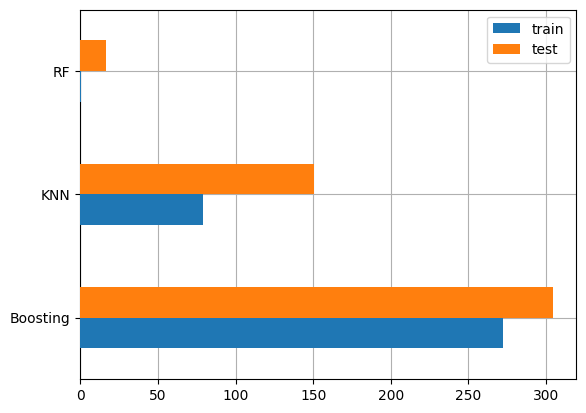

In [27]:
# Plot metrik
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [35]:
# Prediksi menggunakan beberapa harga dari data test

prediksi = X_test.iloc[21:25].copy()
pred_dict = {'y_true':y_test[21:25]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
21,1069,895.6,991.3,788.9
22,1775,1774.7,1773.2,2298.4
23,614,614.1,1029.2,788.9
24,1009,1009.3,969.9,788.9
